In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [66]:
img = cv2.imread('./dataset\Albert_Einstein\Albert_Einstein-Portrait-WEB.decc642c.fill-1600x810-c100.jpg')
img.shape

(810, 1600, 3)

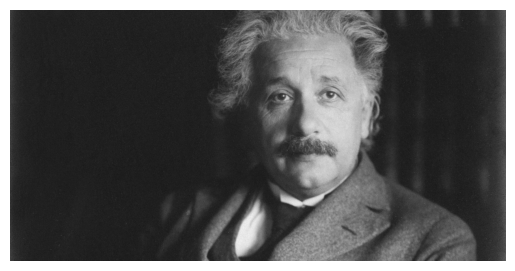

In [67]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [68]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray.shape

(810, 1600)

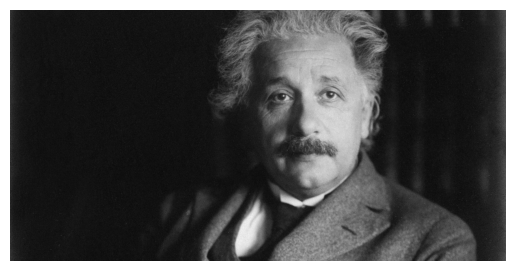

In [69]:
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [70]:
face_cascade = cv2.CascadeClassifier('./opencv\haarcascade\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')

In [71]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[746, 116, 441, 441]])

In [72]:
(x, y, w, h) = faces[0]
x, y, w, h

(746, 116, 441, 441)

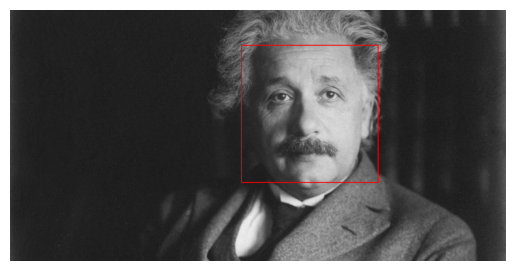

In [73]:
face_img = cv2.rectangle(img, (x,y), (x+h,y+w), (255,0,0), 2)
plt.imshow(face_img)
plt.axis('off')
plt.show()

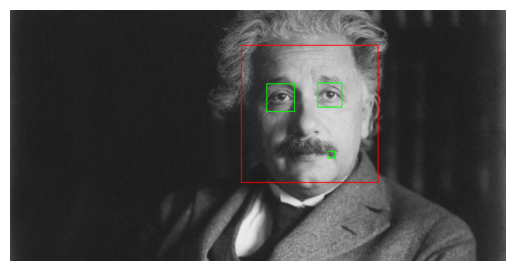

In [74]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.axis('off')
plt.show()

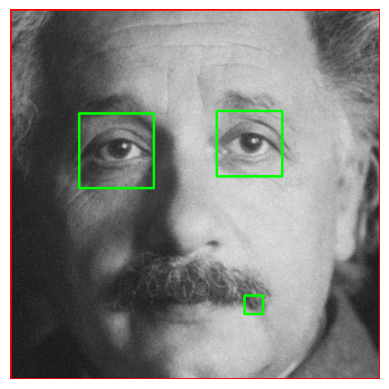

In [75]:
plt.imshow(roi_color, cmap='gray')
plt.axis('off')
plt.show()

In [76]:
def crop_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

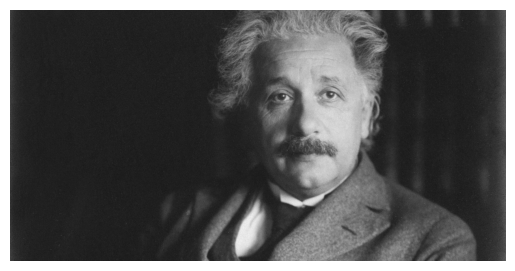

In [77]:
original_image = cv2.imread('./dataset\Albert_Einstein\Albert_Einstein-Portrait-WEB.decc642c.fill-1600x810-c100.jpg')
plt.imshow(original_image)
plt.axis('off')
plt.show()

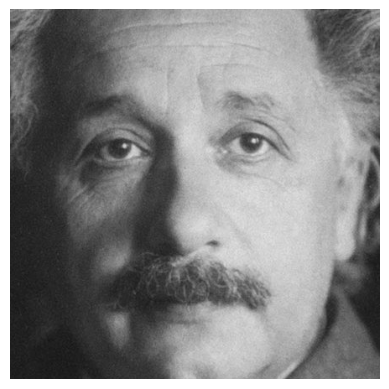

In [78]:
cropped_image = crop_image_if_2_eyes('./dataset\Albert_Einstein\Albert_Einstein-Portrait-WEB.decc642c.fill-1600x810-c100.jpg')
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

## Now we're going to start cleaning our entire dataset

In [79]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [80]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [81]:
img_dirs

['./dataset/Alan_Turing',
 './dataset/Albert_Einstein',
 './dataset/Isaac_Newton',
 './dataset/Marie_Curie']

In [82]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [83]:
cropped_image_dirs = []
scientist_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    scientist_name = img_dir.split('/')[-1]
    print(scientist_name)
    
    scientist_file_names_dict[scientist_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = crop_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + scientist_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = scientist_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            scientist_file_names_dict[scientist_name].append(cropped_file_path)
            count += 1

Alan_Turing
Generating cropped images in folder:  ./dataset/cropped/Alan_Turing
Albert_Einstein
Generating cropped images in folder:  ./dataset/cropped/Albert_Einstein
Isaac_Newton
Generating cropped images in folder:  ./dataset/cropped/Isaac_Newton
Marie_Curie
Generating cropped images in folder:  ./dataset/cropped/Marie_Curie


In [84]:
class_dict = {}
count = 0
for scientist_name in scientist_file_names_dict.keys():
    class_dict[scientist_name] = count
    count = count + 1
class_dict

{'Alan_Turing': 0, 'Albert_Einstein': 1, 'Isaac_Newton': 2, 'Marie_Curie': 3}

In [85]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

### Here, I did some manual cleaning on the dataset to remove mislabeled samples and blurry ones.

In [106]:
X, y = [], []
for scientist_name, training_files in scientist_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (64,64))
        scalled_gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        scalled_gray_img = scalled_gray_img.reshape(64*64)
        X.append(scalled_gray_img)
        y.append(class_dict[scientist_name])

In [107]:
print(len(X))
print(len(y))

119
119


### Plot random samples our final result

In [137]:
import random

def plot_random_sample():
    i = random.randint(0, 118)
    plt.imshow(X[i], cmap='gray')
    plt.title(list(class_dict.keys())[y[i]])
    plt.axis('off')
    plt.show()

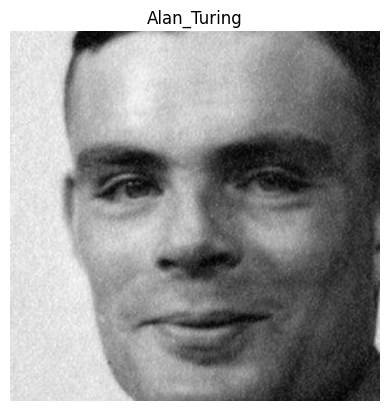

In [138]:
plot_random_sample()

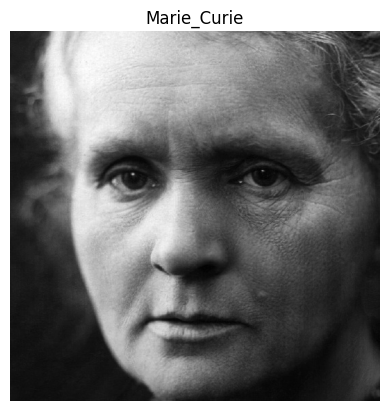

In [139]:
i = random.randint(0, 118)
plt.imshow(X[i], cmap='gray')
plt.title(list(class_dict.keys())[y[i]])
plt.axis('off')
plt.show()

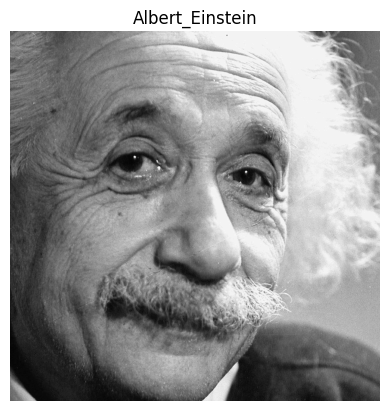

In [140]:
i = random.randint(0, 118)
plt.imshow(X[i], cmap='gray')
plt.title(list(class_dict.keys())[y[i]])
plt.axis('off')
plt.show()

In [155]:
X[12].shape

(197, 197)